In [2]:
install.packages("tm")
install.packages("SnowballC")
install.packages("wordcloud")
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library("tm")
library("SnowballC")
library("wordcloud")
library("ggplot2")

Loading required package: NLP

Loading required package: RColorBrewer


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate




In [5]:
documents <- c(
"Data analysis is fun.",
"Text analysis is a subset of data analysis.",
"Visualization makes analysis easier to understand.",
"Visualization makes analysis fun to understand.",
"Data analysis is fun.",
"Text analysis is a subset of text analysis.",
"Visualization makes analysis easier to understand.",
"Visualization makes analysis fun to understand.",
"Data analysis is fun.",
"Text analysis is a subset of data analysis.",
"Visualization makes analysis easier to understand.",
"Visualization makes analysis fun to understand."
)

In [6]:
corpus <- Corpus(VectorSource(documents))

In [7]:
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removeWords, stopwords("english"))
corpus <- tm_map(corpus, stripWhitespace)

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
“transformation drops documents”


In [8]:
corpus

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 12

In [9]:
tdm <- TermDocumentMatrix(corpus)

In [10]:
tdm_matrix <- as.matrix(tdm)

In [11]:
word_freq <- sort(rowSums(tdm_matrix), decreasing = TRUE)

In [12]:
print("Term Frequency Matrix:")
print(tdm_matrix)

[1] "Term Frequency Matrix:"
               Docs
Terms           1 2 3 4 5 6 7 8 9 10 11 12
  analysis      1 2 1 1 1 2 1 1 1  2  1  1
  data          1 1 0 0 1 0 0 0 1  1  0  0
  fun           1 0 0 1 1 0 0 1 1  0  0  1
  subset        0 1 0 0 0 1 0 0 0  1  0  0
  text          0 1 0 0 0 2 0 0 0  1  0  0
  easier        0 0 1 0 0 0 1 0 0  0  1  0
  makes         0 0 1 1 0 0 1 1 0  0  1  1
  understand    0 0 1 1 0 0 1 1 0  0  1  1
  visualization 0 0 1 1 0 0 1 1 0  0  1  1


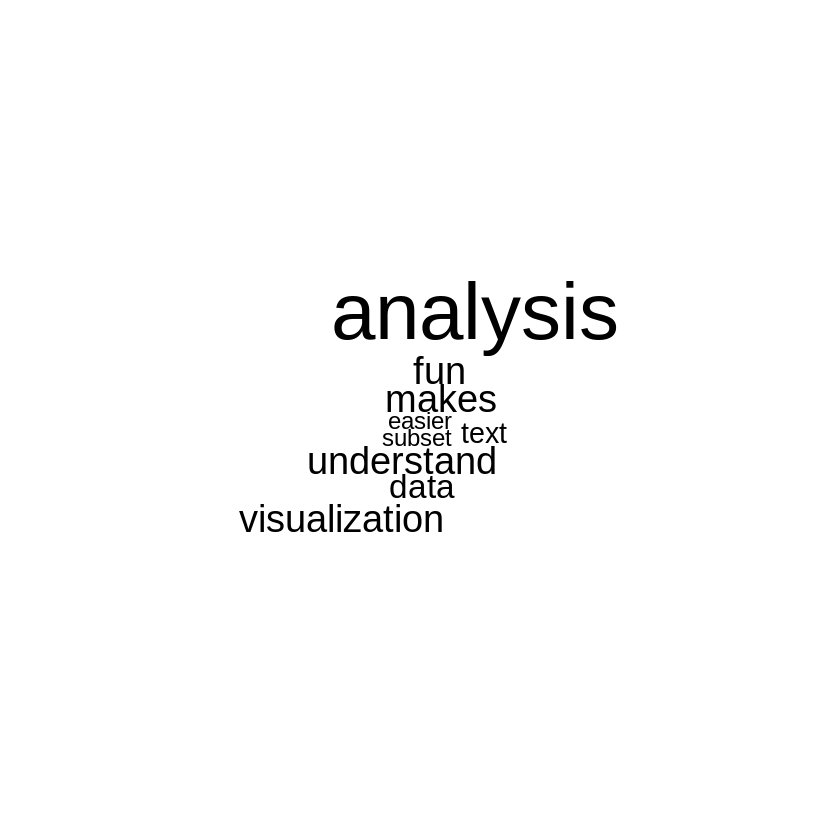

In [13]:
wordcloud(names(word_freq), freq = word_freq, min.freq = 1)

In [14]:
top_5_words <- head(word_freq, 5)

In [15]:
top_5_words_df <- data.frame(
Word = names(top_5_words),
Frequency = top_5_words
)

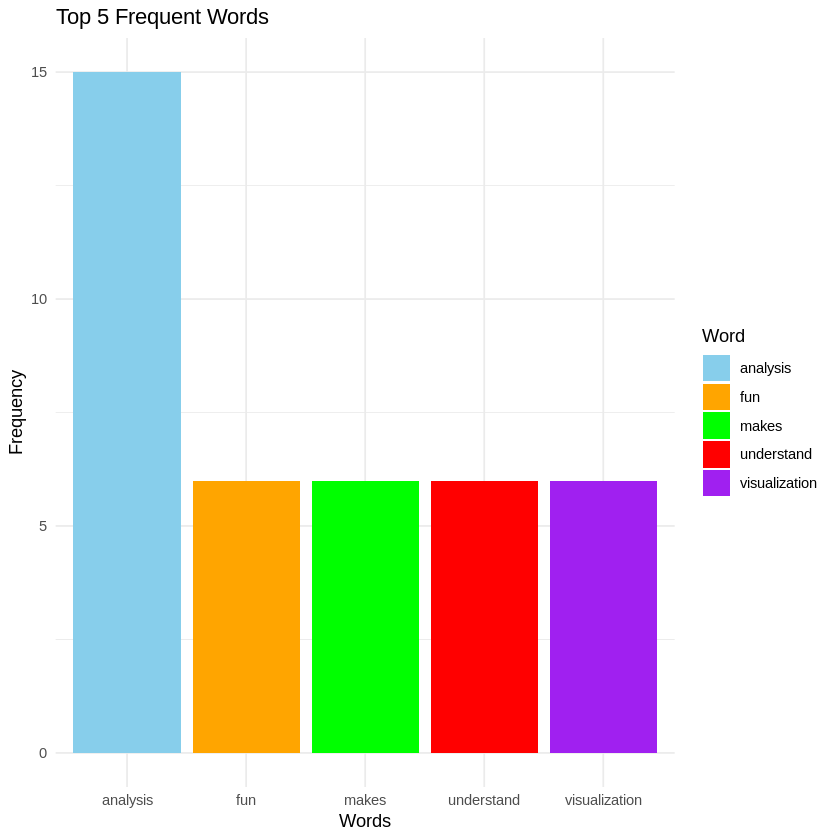

In [16]:
ggplot(top_5_words_df, aes(x = Word, y = Frequency, fill = Word)) +
geom_bar(stat = "identity") +
labs(title = "Top 5 Frequent Words", x = "Words", y = "Frequency") +
theme_minimal() +
scale_fill_manual(values = c("skyblue", "orange", "green", "red", "purple"))

Data analysis

In [17]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [19]:
data <- read.csv("titanic.csv")

In [20]:
str(data)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...


In [21]:
colSums(is.na(data))

PassengerId        Name      Pclass         Sex         Age       SibSp 
          0           0           0           0         177           0 
      Parch      Ticket        Fare       Cabin    Embarked    Survived 
          0           0           0           0           0           0

In [22]:
data$Age[is.na(data$Age)] <- median(data$Age, na.rm = TRUE)

In [23]:
data$Embarked[is.na(data$Embarked)] <- "S"

In [24]:
# Convert relevant columns to factors
data$Survived <- factor(data$Survived, levels = c(0, 1), labels = c("No", "Yes"))
data$Pclass <- factor(data$Pclass)
data$Sex <- factor(data$Sex)

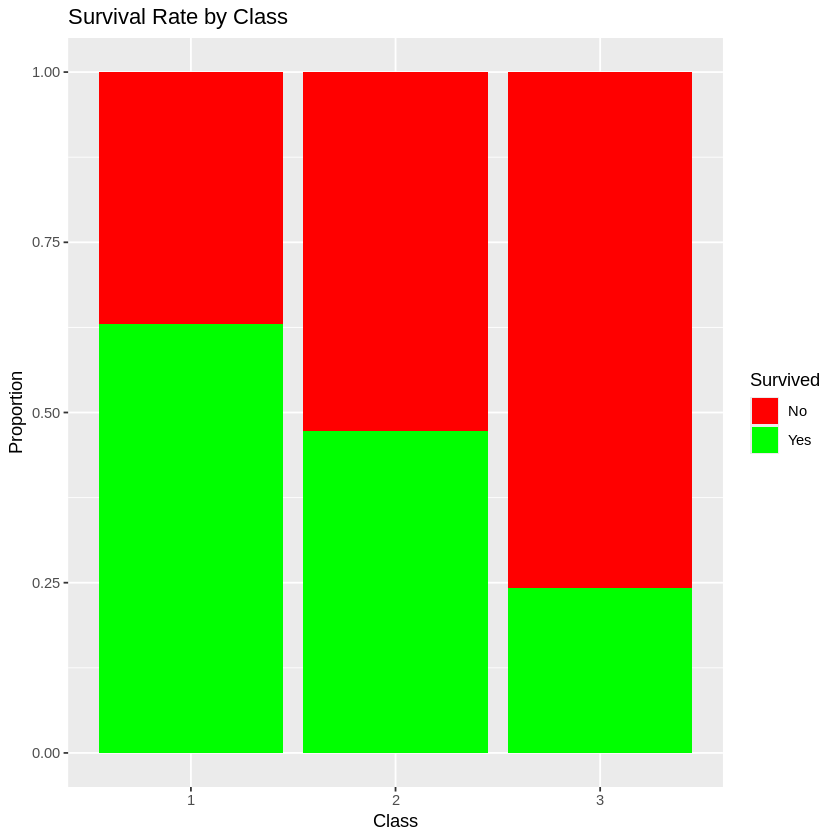

In [25]:
# Survival rate by class
ggplot(data, aes(x = Pclass, fill = Survived)) +
geom_bar(position = "fill") +
labs(title = "Survival Rate by Class", y = "Proportion", x = "Class") + scale_fill_manual(values = c("red", "green"))